# Node2Vec Embeddings for OOPs Dataset

## Mount to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/node2vec

/content/drive/.shortcut-targets-by-id/17Gn89Edqfyxljr8tO09VdcQWGcUCa_Ua/descriptive_evaluation_project/node2vec


## Generate Embeddings using Node2Vec

### Import Packages and set variables

In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.cluster import KMeans
import pprint
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
DATASET_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/node2vec/oops_dataset.csv'

## Code

In [ ]:
oop_dataset=pd.read_csv(DATASET_CSV, encoding='unicode_escape')
oop_dataset.head()

,EssayText
0,Object-Oriented Programming(OOPs) is a type of...
1,Object-oriented programming (OOP) is a compute...
2,Object-oriented programming is a programming p...
3,Object-oriented programming (OOP) is a program...
4,Object-Oriented Programming or OOPs refers to ...


In [ ]:
# Import required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# Prerequisites for cleaning
nltk.download("stopwords")                      # Download stopwords from NLTK library
nltk.download('wordnet')                        # Download wordnet, a lexixal database from NLTK library
stopwords = set(stopwords.words('english'))     # Store stopwords
lemmatizer = WordNetLemmatizer()                # Create object for lemmatization

# Function for standard cleaning of text (remove punctuations, abbreviations, etc.) using regular expressions
def standard_clean(text):
  text = str(text)
  text = text.lower()
  text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r",", " ", text)
  text = re.sub(r"\.", " ", text)
  text = re.sub(r"!", " ! ", text)
  text = re.sub(r"\/", " ", text)
  text = re.sub(r"\^", " ^ ", text)
  text = re.sub(r"\+", " + ", text)
  text = re.sub(r"\-", " - ", text)
  text = re.sub(r"\=", " = ", text)
  text = re.sub(r"'", " ", text)
  text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
  text = re.sub(r":", " : ", text)
  text = re.sub(r" e g ", " eg ", text)
  text = re.sub(r" b g ", " bg ", text)
  text = re.sub(r" u s ", " american ", text)
  text = re.sub(r"\0s", "0", text)
  text = re.sub(r" 9 11 ", "911", text)
  text = re.sub(r"e - mail", "email", text)
  text = re.sub(r"j k", "jk", text)
  text = re.sub(r"\s{2,}", " ", text)
  text = re.sub(r"-", " ", text)
  return text

# Function to remove stopwords from a sentence
def remove_stopwords(text):
  text = text.split()
  clean = ""
  for w in text:
    if w not in stopwords:
      clean = clean + " " + w
  return str(clean[1:])

# Function to lemmatize words of a sentence using Lemmatizer object
def lemmatize(text):
  text = text.split()
  clean = ""
  for w in text:
    clean = clean + " " + lemmatizer.lemmatize(w)
  return str(clean[1:])

# Function to clean the text
def clean(text):
  text = standard_clean(text)
  text = remove_stopwords(text)
  text = lemmatize(text)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
oop_dataset['EssayText'] = oop_dataset['EssayText'].map(lambda x: clean(x))
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(word_tokenize)
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(lambda x: ','.join([str(item) for item in x]))
oop_dataset.head()

,EssayText
0,"object,oriented,programming,oops,type,programm..."
1,"object,oriented,programming,oop,computer,progr..."
2,"object,oriented,programming,programming,paradi..."
3,"object,oriented,programming,oop,programming,pa..."
4,"object,oriented,programming,oops,refers,langua..."


In [ ]:
tokenizer = dict()
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(
    lambda named_entities: [tokenizer.setdefault(named_entitie, len(tokenizer))
                            for named_entitie in named_entities.split(',')])
oop_dataset.head()

,EssayText
0,"[0, 1, 2, 3, 4, 2, 5, 0, 6, 7, 8, 9, 0, 10, 11..."
1,"[0, 1, 2, 27, 28, 2, 29, 30, 31, 32, 33, 24, 0..."
2,"[0, 1, 2, 2, 40, 41, 42, 0, 43, 24, 25, 44, 24..."
3,"[0, 1, 2, 27, 2, 40, 5, 42, 0, 43, 24, 25, 47,..."
4,"[0, 1, 2, 3, 53, 54, 55, 0, 2, 0, 1, 2, 56, 12..."


In [ ]:
pairs_df = oop_dataset['EssayText'].apply(lambda named_entities: list(itertools.combinations(named_entities, 2)))
pairs_df = pairs_df[pairs_df.apply(len) > 0]
pairs_df = pd.DataFrame(np.concatenate(pairs_df.values), columns=['named_entity_1', 'named_entity_2'])
pairs_df.head(10)

,named_entity_1,named_entity_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,2
5,0,5
6,0,0
7,0,6
8,0,7
9,0,8


In [ ]:
NAMED_ENTITIES_CO_OCCURENCE_THRESHOLD = 25

edges_df = pairs_df.groupby(['named_entity_1', 'named_entity_2']).size().reset_index(name='weight')
edges_df = edges_df[edges_df['weight'] > NAMED_ENTITIES_CO_OCCURENCE_THRESHOLD]
edges_df[['named_entity_1', 'named_entity_2', 'weight']].to_csv('edges.csv', header=False, index=False, sep=' ')
edges_df.head()

,named_entity_1,named_entity_2,weight
0,0,0,389
1,0,1,98
2,0,2,116
4,0,4,72
7,0,7,101


In [ ]:
!python references/node2vec/src/main.py --input edges.csv --output emb --weighted
# !python node2vec/src/main.py --input edges.csv --output emb --weighted

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
vocalublary ['335', '11', '7', '297', '22', '52', '128', '223', '197', '158', '294', '293', '601', '777', '66', '216', '199', '0', '130', '2', '534', '39', '54', '439', '61', '225', '571', '165', '242', '140', '282', '53', '18', '113', '813', '610', '285', '47', '181', '526', '24', '577', '713', '1', '150', '27', '132', '348', '92', '544', '72', '516', '804', '93', '493', '171', '50', '980', '195', '228', '343', '159', '108', '19', '109', '73', '12', '279', '51', '532', '435', '901', '356', '427', '25', '64', '4', '14', '15', '74', '17', '296', '1380', '655', '1053', '157', '180', '499', '70', '288', '406', '42', '347', '135', '396', '198', '210', '441', '21', '920', '82', '411', '524', '13', '129', '57', '589', '1361', '196', '525', '35', '453', '1225', '557', '912', '911', '812', '600', '918', '16', '500', '361', '330', '65', '161', '160', '791'] length 127


In [ ]:
emb_df = pd.read_csv('emb', sep=' ', skiprows=[0], header=None)
emb_df.set_index(0, inplace=True)
emb_df.index.name = 'named_entity'
emb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
named_entity,,,,,,,,,,,,,,,,,,,,,
11,0.193837,0.091613,-0.129739,-0.031366,-0.097477,-0.255943,0.069669,0.123786,0.174328,0.016449,...,-0.156531,0.077635,-0.052190,0.056181,-0.048899,0.014215,-0.051892,0.088134,-0.112833,-0.089891
0,0.140999,0.074247,-0.150189,0.020198,-0.123899,-0.170970,-0.083721,0.108478,0.196618,-0.103220,...,-0.079018,0.131198,0.045188,0.018058,0.076767,0.055970,0.080860,0.059405,-0.343980,-0.198519
52,0.177606,0.001414,-0.085347,0.027506,-0.115670,-0.192936,0.055233,0.144668,0.195468,-0.035360,...,-0.075324,-0.024570,-0.105449,0.096931,-0.042678,0.101068,0.014049,0.057180,-0.186243,-0.094282
7,0.231822,0.009209,-0.061507,0.020019,-0.108214,-0.327653,-0.026915,0.150408,0.182442,0.054947,...,-0.134187,0.037041,-0.054160,0.046762,0.049133,0.051182,-0.019587,0.072480,-0.247517,-0.053754
24,0.259753,0.087181,0.034161,-0.015972,-0.152188,-0.195292,0.005249,0.181801,0.063325,0.137862,...,0.116425,-0.014757,0.048548,0.128475,0.129863,0.028518,0.080643,-0.080460,-0.373359,0.057926


## Manhattan LSTM

### Import Packages

In [ ]:
from time import time
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import datetime

from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda
import keras.backend as K
# from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
TRAIN_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/all_codes_test/manh_lstm/train_main.csv'
TEST_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/all_codes_test/manh_lstm/train_main.csv'
EMBEDDING_FILE = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/node2vec/emb'

In [ ]:
def text_to_word_list(text):
  standard_clean(text)
  text=text.split()
  return text

In [ ]:
# Prepare embedding
vocabulary = dict()
inverse_vocabulary = ['<unk>']  # '<unk>' will never be used, it is only a placeholder for the [0, 0, ....0] embedding
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

questions_cols = ['question1', 'question2']

In [ ]:
train_df = pd.read_csv(TRAIN_CSV)
train_df

,Unnamed: 0,question1,question2,is_duplicate
0,0,Dynamic (run time) polymorphism is the polymor...,Constructor is piece of code which we are usin...,0
1,1,A virtual function or virtual method in an OOP...,"Within a single program, output of a function ...",0
2,2,new: Allocates memory for the object on the fr...,Object is an instance of a class. An object in...,0
3,3,Overloading occurs when two or more methods in...,OOPs allows us to hide implementation details ...,0
4,4,An interface is most certainly not a blueprint...,An interface is better than a abstract class w...,0
...,...,...,...,...
211533,211533,OOPs allows us to hide implementation details ...,"Exception is an abnormal condition. In Java, a...",0
211534,211534,"When Java encounters an exception, it throws i...","An interface is a completely ""abstract class"" ...",0
211535,211535,Copy constructor is called when a new object i...,Overriding occurs when two methods have the sa...,0
211536,211536,Dynamic Polymorphism(Late Binding/ Runtime Pol...,The interface consists of the signatures of me...,0


In [ ]:
test_df = pd.read_csv(TEST_CSV)
test_df

,Unnamed: 0,question1,question2,is_duplicate
0,0,Dynamic (run time) polymorphism is the polymor...,Constructor is piece of code which we are usin...,0
1,1,A virtual function or virtual method in an OOP...,"Within a single program, output of a function ...",0
2,2,new: Allocates memory for the object on the fr...,Object is an instance of a class. An object in...,0
3,3,Overloading occurs when two or more methods in...,OOPs allows us to hide implementation details ...,0
4,4,An interface is most certainly not a blueprint...,An interface is better than a abstract class w...,0
...,...,...,...,...
211533,211533,OOPs allows us to hide implementation details ...,"Exception is an abnormal condition. In Java, a...",0
211534,211534,"When Java encounters an exception, it throws i...","An interface is a completely ""abstract class"" ...",0
211535,211535,Copy constructor is called when a new object i...,Overriding occurs when two methods have the sa...,0
211536,211536,Dynamic Polymorphism(Late Binding/ Runtime Pol...,The interface consists of the signatures of me...,0


In [ ]:


# Iterate over the questions only of both training and test datasets
for dataset in [train_df, test_df]:
    # print(dataset)
    for index, row in dataset.iterrows():

        # Iterate through the text of both questions of the row
        for question in questions_cols:
            # print(question)
            q2n = []  # q2n -> question numbers representation
            for word in text_to_word_list(row[question]):
                # print(word)
                # Check for unwanted words
                if word in stopwords and word not in word2vec.vocab:
                    continue

                if word not in vocabulary:
                    vocabulary[word] = len(inverse_vocabulary)
                    q2n.append(len(inverse_vocabulary))
                    inverse_vocabulary.append(word)
                else:
                    q2n.append(vocabulary[word])

            # Replace questions as word to question as number representation
            dataset.at[index, question] = q2n
            


In [ ]:
embedding_dim = 128
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
embeddings[0] = 0  # So that the padding will be ignored

# Build the embedding matrix
for word, index in vocabulary.items():
    if word in word2vec.vocab:
        embeddings[index] = word2vec.word_vec(word)

del word2vec

In [ ]:
max_seq_length = max(train_df.question1.map(lambda x: len(x)).max(),
                     train_df.question2.map(lambda x: len(x)).max(),
                     test_df.question1.map(lambda x: len(x)).max(),
                     test_df.question2.map(lambda x: len(x)).max())

# Split to train validation

validation_size = 40000
training_size = len(train_df) - validation_size

X = train_df[questions_cols]
Y = train_df['is_duplicate']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Split to dicts
X_train = {'left': X_train.question1, 'right': X_train.question2}
X_validation = {'left': X_validation.question1, 'right': X_validation.question2}
X_test = {'left': test_df.question1, 'right': test_df.question2}

# Convert labels to their numpy representations
Y_train = Y_train.values
Y_validation = Y_validation.values

# Zero padding
for dataset, side in itertools.product([X_train, X_validation], ['left', 'right']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_seq_length)

# Make sure everything is ok
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(Y_train)

In [ ]:
# Model variables
from tensorflow.keras.optimizers import Adadelta
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length, trainable=False)

# Embedded version of the inputs
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Start training
training_start_time = time()

malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], Y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Epoch 1/25
2681/2681 [==============================] - 203s 75ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 2/25
2681/2681 [==============================] - 203s 76ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 3/25
2681/2681 [==============================] - 206s 77ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 4/25
2681/2681 [==============================] - 207s 77ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 5/25
2681/2681 [==============================] - 218s 81ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 6/25
2681/2681 [==============================] - 205s 76ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0026 - val_accuracy: 0.9974
Epoch 7/25
2681/2681 [==============================] - 206s 77ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0

In [ ]:
malstm_trained.history['accuracy']
malstm_trained.history['val_accuracy']

[0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918,
 0.9973750114440918]

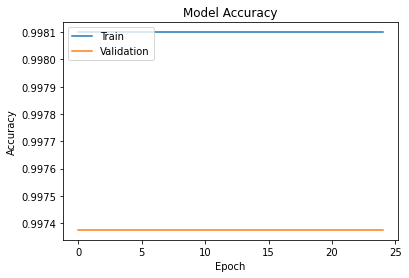

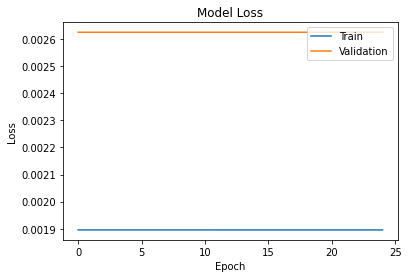

In [ ]:
# Plot accuracy
plt.plot(malstm_trained.history['accuracy'])
plt.plot(malstm_trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained.history['loss'])
plt.plot(malstm_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()